# Pre-processing LinkedIn Files

Following are the list of files gathered by linkedIn:

1. Visitor stats
2. Updates
3. Followers


Following files will be combined to draw - Engagement insights

**Engagement Insights:**
Draw insight on:
<ul>
    <li>total page views to date,</li>
    <li> total unique visitors to </li>
    <li> average engagement rate </li>
    <li> linked In posts </li>
</ul>


**Visitor Insights:**
Draw insight on visitor demographics:
<ul>
    <li> Location of visitors </li>
    <li> Visitor by industry </li>
 </ul>
 
**Follower Insights:**
Draw insight on follower demographics:
<ul>
    <li> Location of followers </li>
    <li> Follower Industry </li>
 </ul>
 

## Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
import csv


### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import plotly 

# Replace with your information
plotly.tools.set_credentials_file(username='mchivuku', api_key='ONCxWI3IjbPiHtld9PFm')
# plotly standard imports
import plotly.graph_objs as go
import plotly.plotly as py

# Cufflinks wrapper on plotly
import cufflinks


# Options for pandas
pd.options.display.max_columns = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot
cufflinks.go_offline()

# Set global theme
cufflinks.set_config_file(world_readable=True, theme='pearl')

%matplotlib inline
plt.style.use("seaborn")



## Settings

In [2]:
raw_data_dir = os.path.join("../../","data","raw_data","iupui","linkedIn")
processed_data_dir = os.path.join("../../","data","processed_data","iupui","linkedIn")

followers_file =  "indiana-university_purdue-university-indianapolis_followers.xls"
engagements_file = "indiana-university_purdue-university-indianapolis_updates.xls"
visitor_file = "indiana-university_purdue-university-indianapolis_visitors.xls"

start_date = date(2018, 6, 10)  # start date
end_date = date(2019, 6, 10)    # end date


## Read from
visitors_file_path = os.path.join(raw_data_dir,visitor_file )
followers_file_path = os.path.join(raw_data_dir,followers_file )
engagements_file_path = os.path.join(raw_data_dir, engagements_file)


## Exploratory Data Analysis (EDA)

In [3]:
visitors = pd.ExcelFile(visitors_file_path)
engagements = pd.ExcelFile(engagements_file_path)
followers = pd.ExcelFile(followers_file_path)


### Visitors

In [4]:
print(visitors.sheet_names)

['Visitor metrics', 'Location', 'Job function', 'Seniority', 'Industry', 'Company size']


In [5]:
visitor_metrics_df = pd.read_excel(visitors_file_path, sheet_name='Visitor metrics')
visitor_location_df = pd.read_excel(visitors_file_path,sheet_name = "Location")
visitor_job_function_df = pd.read_excel(visitors_file_path,sheet_name = "Job function")
visitor_industry_df = pd.read_excel(visitors_file_path,sheet_name= "Industry")
visitor_company_size_df = pd.read_excel(visitors_file_path, sheet_name = "Company size")
visitor_seniority_df = pd.read_excel(visitors_file_path,sheet_name = "Seniority")


## Setting Date as index
visitor_metrics_df["Date"]= pd.to_datetime(visitor_metrics_df["Date"]) 


In [6]:
print("Min date:", visitor_metrics_df['Date'].min(), " Max date:", visitor_metrics_df["Date"].max())
print(f"Number of records, in visitor metrics: {visitor_metrics_df.shape}")
print(f"Number of records, in visitor location: {visitor_location_df.shape}")
print(f"Number of records, in visitor job function: {visitor_job_function_df.shape}")
print(f"Number of records, in visitor industry: {visitor_industry_df.shape}")
print(f"Number of records, in visitor company size: {visitor_company_size_df.shape}")
print(f"Number of records, in visitor seniority: {visitor_seniority_df.shape}")




Min date: 2018-06-10 00:00:00  Max date: 2019-06-10 00:00:00
Number of records, in visitor metrics: (366, 25)
Number of records, in visitor location: (173, 2)
Number of records, in visitor job function: (26, 2)
Number of records, in visitor industry: (120, 2)
Number of records, in visitor company size: (9, 2)
Number of records, in visitor seniority: (10, 2)


In [7]:
page_views_df = visitor_metrics_df[['Total page views (desktop)', 'Total page views (mobile)','Total unique visitors (mobile)',
                                    'Total unique visitors (desktop)',
          'Date']].set_index('Date').resample('M').mean()

page_views_df.iplot(
    kind='line',
    xTitle='Date',
    yTitle='Average Views',
    title='Monthly Page Views')

In [8]:
colorscales = [
    'Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu', 'Reds', 'Blues',
    'Picnic', 'Rainbow', 'Portland', 'Jet', 'Hot', 'Blackbody', 'Earth',
    'Electric', 'Viridis', 'Cividis'
]
visitor_industry_df.iplot(x='Total views', y='Industry',  kind='bubble2d', xTitle='Total views', yTitle='Industry',
           theme='pearl', size='Total views',
         categories='Industry', title='Plot Sized by Total Views and Colored by Industry')

### Updates or Engagements

In [9]:
print(engagements.sheet_names)

['Update metrics (aggregated)', 'Update engagement']


In [10]:
engagement_metrics_aggregate_df = pd.read_excel(engagements_file_path,sheet_name = 'Update metrics (aggregated)')
engagement_metrics_update_df = pd.read_excel(engagements_file_path,sheet_name = 'Update engagement')

##### Fix the Header

In [11]:
## Fix the Header
new_header = engagement_metrics_update_df.iloc[0] #grab the first row for the header
engagement_metrics_update_df = engagement_metrics_update_df[1:] #take the data less the header row
engagement_metrics_update_df.columns = new_header #set the header row as the df header


new_header_agg = engagement_metrics_aggregate_df.iloc[0] #grab the first row for the header
engagement_metrics_aggregate_df = engagement_metrics_aggregate_df[1:] #take the data less the header row
engagement_metrics_aggregate_df.columns = new_header_agg #set the header row as the df header


In [12]:
engagement_metrics_update_df.columns, engagement_metrics_aggregate_df.columns

(Index(['Update title', 'Update link', 'Update type', 'Campaign name',
        'Posted by', 'Created date', 'Campaign start date', 'Campaign end date',
        'Audience', 'Impressions', 'Video views', 'Clicks',
        'Click through rate (CTR)', 'Likes', 'Comments', 'Shares', 'Follows',
        'Engagement rate'],
       dtype='object', name=0),
 Index(['Date', 'Impressions (organic)', 'Impressions (sponsored)',
        'Impressions (total)', 'Unique impressions (organic)',
        'Clicks (organic)', 'Clicks (sponsored)', 'Clicks (total)',
        'Reactions (organic)', 'Reactions (sponsored)', 'Reactions (total)',
        'Comments (organic)', 'Comments (sponsored)', 'Comments (total)',
        'Shares (organic)', 'Shares (sponsored)', 'Shares (total)',
        'Engagement rate (organic)', 'Engagement rate (sponsored)',
        'Engagement rate (total)'],
       dtype='object', name=0))

In [13]:
print("Min date:", engagement_metrics_update_df["Created date"].min(), " Max date:", engagement_metrics_update_df["Created date"].max())
print(f"No of records: {engagement_metrics_update_df.shape}")

Min date: 01/04/2019  Max date: 12/17/2018
No of records: (43, 18)


In [14]:
engagement_metrics_aggregate_df.head(),engagement_metrics_aggregate_df.columns

(0        Date Impressions (organic) Impressions (sponsored)  \
 1  06/10/2018                     0                       0   
 2  06/11/2018                     0                       0   
 3  06/12/2018                     0                       0   
 4  06/13/2018                     0                       0   
 5  06/14/2018                     0                       0   
 
 0 Impressions (total) Unique impressions (organic) Clicks (organic)  \
 1                   0                            0                0   
 2                   0                            0                0   
 3                   0                            0                0   
 4                   0                            0                0   
 5                   0                            0                0   
 
 0 Clicks (sponsored) Clicks (total) Reactions (organic) Reactions (sponsored)  \
 1                  0              0                   0                     0   
 2              

In [15]:
engagement_metrics_aggregate_df["Date"] = pd.to_datetime(engagement_metrics_aggregate_df["Date"])

In [16]:
# determine the percent of missing values
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

percent_missing(engagement_metrics_aggregate_df)

{'Date': 0.0,
 'Impressions (organic)': 0.0,
 'Impressions (sponsored)': 0.0,
 'Impressions (total)': 0.0,
 'Unique impressions (organic)': 0.0,
 'Clicks (organic)': 0.0,
 'Clicks (sponsored)': 0.0,
 'Clicks (total)': 0.0,
 'Reactions (organic)': 0.0,
 'Reactions (sponsored)': 0.0,
 'Reactions (total)': 0.0,
 'Comments (organic)': 0.0,
 'Comments (sponsored)': 0.0,
 'Comments (total)': 0.0,
 'Shares (organic)': 0.0,
 'Shares (sponsored)': 0.0,
 'Shares (total)': 0.0,
 'Engagement rate (organic)': 0.0,
 'Engagement rate (sponsored)': 0.0,
 'Engagement rate (total)': 0.0}

In [17]:
#engagement_metrics_aggregate_df.set_index("Date")
engagement_metrics_aggregate_df.groupby(engagement_metrics_aggregate_df['Date'].dt.strftime('%B'))['Engagement rate (total)'].describe()

,count,unique,top,freq
Date,,,,
April,30.0,30.0,0.020636,1.0
August,31.0,31.0,0.015863,1.0
December,31.0,31.0,0.008167,1.0
February,28.0,28.0,0.007213,1.0
January,31.0,31.0,0.015111,1.0
July,31.0,31.0,0.016815,1.0
June,31.0,26.0,0.000000,6.0
March,31.0,31.0,0.020365,1.0
May,31.0,31.0,0.015292,1.0


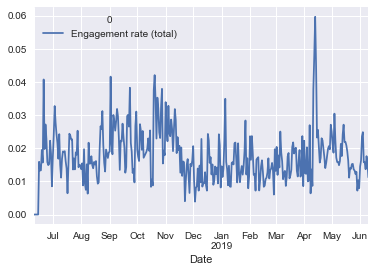

In [18]:
engagement_metrics_aggregate_df[["Engagement rate (total)","Date"]].set_index("Date").plot()

In [19]:
engagement_metrics_update_df.columns

Index(['Update title', 'Update link', 'Update type', 'Campaign name',
       'Posted by', 'Created date', 'Campaign start date', 'Campaign end date',
       'Audience', 'Impressions', 'Video views', 'Clicks',
       'Click through rate (CTR)', 'Likes', 'Comments', 'Shares', 'Follows',
       'Engagement rate'],
      dtype='object', name=0)

In [20]:
engagement_metrics_update_df.sort_values(by='Engagement rate',ascending=False).loc[:20,'Update title']

9     The MDCRB is an adaptable facility that will m...
29    Another reason why we love Indy: The Circle Ci...
28    Take an early look at the future Multidiscipli...
34    Celebrating a legacy of strength: The IU Schoo...
27    Women and minority researchers at all Indiana ...
42    IUPUI's 50th Anniversary year celebration has ...
3     This weekend, we celebrated the largest gradua...
32    It's September, which can only mean one thing:...
40    "With more than 180,000 alumni, 7,000 full-tim...
36    Generous gifts from IU alumni Jefferson and Ma...
6     Eric Hewlett left the South Side of Chicago so...
33    Stories from alumni, students, faculty and sta...
1     We've changed a lot in 50 short years. We're n...
37    Need a reason to come back to campus? Celebrat...
22    IUPUI and TechPoint (Indiana) have developed a...
11    IUPUI is leading the conversation about urban ...
31    Scientists from the IU School of Medicine have...
30    Through this grant, the IU School of Denti

### Followers

In [21]:
print(followers.sheet_names)

['New followers', 'Location', 'Job function', 'Seniority', 'Industry', 'Company size']


In [22]:
new_followers_df = pd.read_excel(followers_file_path, sheet_name='New followers')
followers_location_df = pd.read_excel(followers_file_path,sheet_name = "Location")
followers_job_function_df = pd.read_excel(followers_file_path,sheet_name = "Job function")
followers_industry_df = pd.read_excel(followers_file_path,sheet_name= "Industry")
followers_company_size_df = pd.read_excel(followers_file_path, sheet_name = "Company size")
followers_seniority_df = pd.read_excel(followers_file_path,sheet_name = "Seniority")


In [23]:
print("Min date:", new_followers_df['Date'].min(), " Max date:", new_followers_df["Date"].max())
print(f"Number of records, in followers metrics: {new_followers_df.shape}")
print(f"Number of records, in followers location: {followers_location_df.shape}")
print(f"Number of records, in followers job function: {followers_job_function_df.shape}")
print(f"Number of records, in followers industry: {followers_industry_df.shape}")
print(f"Number of records, in followers company size: {followers_company_size_df.shape}")
print(f"Number of records, in followers seniority: {followers_seniority_df.shape}")



Min date: 01/01/2019  Max date: 12/31/2018
Number of records, in followers metrics: (375, 4)
Number of records, in followers location: (99, 2)
Number of records, in followers job function: (26, 2)
Number of records, in followers industry: (99, 2)
Number of records, in followers company size: (9, 2)
Number of records, in followers seniority: (10, 2)


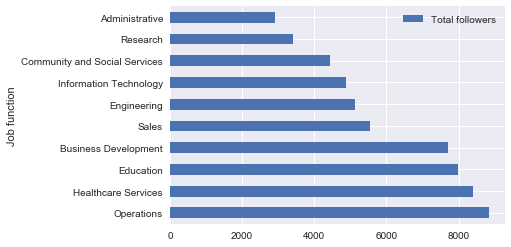

In [24]:
followers_job_function_df.sort_values(by="Total followers",ascending = False)[:10].set_index("Job function").plot(kind="barh")

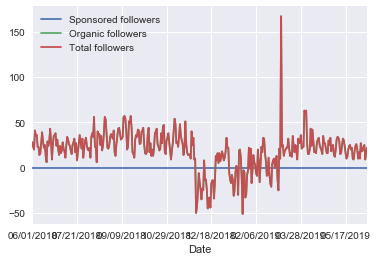

In [25]:
new_followers_df.set_index("Date").plot(kind="line")

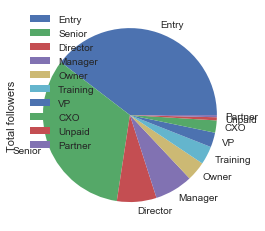

In [26]:
followers_seniority_df.set_index("Seniority").plot.pie(y = "Total followers")


In [27]:
followers_location_df.set_index("Location").sort_values(by="Total followers",ascending=False)[:20]

,Total followers
Location,
"Indianapolis, Indiana Area",67887
Greater Chicago Area,2901
"Bloomington, Indiana Area",1406
"Fort Wayne, Indiana Area",1267
"Louisville, Kentucky Area",1254
"Cincinnati, Ohio Area",1190
"Lafayette, Indiana Area",1019
San Francisco Bay Area,882
Greater Atlanta Area,878


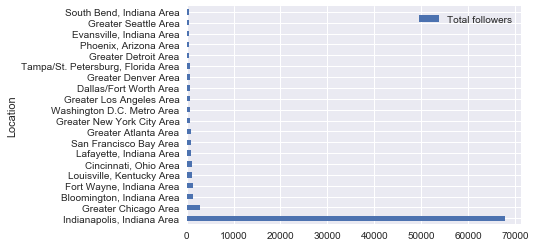

In [28]:
followers_location_df.set_index("Location").sort_values(by="Total followers",ascending=False)[:20].plot(kind="barh")

### Engagement Insights

In [32]:
def make_engagement_insights(visitor_metrics_df, engagement_metrics_aggregate_df, new_followers_df):
    columns = ['Date',
                        'Total page views (desktop)',
                        'Total page views (mobile)',
                        'Total page views (total)',
                        'Total unique visitors (desktop)',
                        'Total unique visitors (mobile)',
                        'Total unique visitors (total)',
                        'Sponsored followers',
                        'Organic followers',
                        'Total followers',
                        'Impressions (organic)', 
                        'Impressions (sponsored)',
                        'Impressions (total)', 
                        'Unique impressions (organic)',
        'Clicks (organic)', 'Clicks (sponsored)', 'Clicks (total)',
        'Reactions (organic)', 'Reactions (sponsored)', 'Reactions (total)',
        'Comments (organic)', 'Comments (sponsored)', 'Comments (total)',
        'Shares (organic)', 'Shares (sponsored)', 'Shares (total)',
        'Engagement rate (organic)', 'Engagement rate (sponsored)',
        'Engagement rate (total)']


    # days between start and end date
    delta = end_date - start_date  # timedelta
    
    visitor_metrics_df = visitor_metrics_df.fillna(0)
    engagement_metrics_aggregate_df = engagement_metrics_aggregate_df.fillna(0)
    new_followers_df = new_followers_df.fillna(0)
    
    ## Set Index Date
    visitor_metrics_df["Date"] = pd.to_datetime(visitor_metrics_df["Date"])
    new_followers_df["Date"] = pd.to_datetime(new_followers_df["Date"])
    engagement_metrics_aggregate_df["Date"] = pd.to_datetime(engagement_metrics_aggregate_df["Date"])
    
    visitor_metrics_df = visitor_metrics_df.set_index("Date")
    new_followers_df = new_followers_df.set_index("Date")
    engagement_metrics_aggregate_df = engagement_metrics_aggregate_df.set_index("Date")

    lines = []
    for i in range(delta.days + 1):
        metric = []

        date = start_date + timedelta(days=i)
        

        ## visitor metrics
        v = visitor_metrics_df[visitor_metrics_df.index.date==date]
        metric.append(date)
        if not v.shape[0] == 0:
            metric.append(float(v["Total page views (desktop)"]))
            metric.append(float(v["Total page views (mobile)"]))
            metric.append(float(v["Total page views (total)"]))
            metric.append(float(v["Total unique visitors (desktop)"]))
            metric.append(float(v["Total unique visitors (mobile)"]))
            metric.append(float(v["Total unique visitors (total)"]))
        else:
            for m in range(7):
                metric.append(0.0)
            

        ## follower metrics

        f = new_followers_df[new_followers_df.index.date==date]
        
        if not f.shape[0]==0:
            metric.append(float(f["Sponsored followers"]))
            metric.append(float(f["Organic followers"]))
            metric.append(float(f['Total followers']))
        else:
            metric.append(0.0)
            metric.append(0.0)
            metric.append(0.0)

        ## engagement 
        try:
            e = engagement_metrics_aggregate_df[engagement_metrics_aggregate_df.index.date == date]
            metric.append(float(e['Impressions (organic)']))
            metric.append(float(e['Impressions (sponsored)']))
            metric.append(float(e['Impressions (total)']))
            metric.append(float(e['Unique impressions (organic)']))
            metric.append(float(e['Clicks (organic)']))
            metric.append(float(e['Clicks (total)']))
            metric.append(float(e['Clicks (sponsored)']))
            metric.append(float(e['Reactions (organic)']))
            metric.append(float(e['Reactions (sponsored)']))
            metric.append(float(e['Reactions (total)']))
            metric.append(float(e['Comments (organic)']))
            metric.append(float(e['Comments (sponsored)']))
            metric.append(float(e['Comments (total)']))
            metric.append(float(e['Shares (organic)']))
            metric.append(float(e['Shares (sponsored)']))
            metric.append(float(e['Shares (total)']))
            metric.append(float(e['Engagement rate (organic)']))
            metric.append(float(e['Engagement rate (sponsored)']))
            metric.append(float(e['Engagement rate (total)']))         
        except:   
            print("exception",str(e))
            for r in range(19):
                metric.append(0)
                
        lines.append(metric)
        
    
    ### 
    df = pd.DataFrame(lines, 
               columns =columns)
    return df
    
        

In [33]:
engagement_df = make_engagement_insights(visitor_metrics_df,engagement_metrics_aggregate_df,new_followers_df)

In [34]:
print(f"Number of rows and columns",engagement_df.shape)

Number of rows and columns (366, 29)


In [35]:
engagement_df["Date"].max()


datetime.date(2019, 6, 10)

In [36]:
#engagement_top_posts_filepath

engagement_df.head()

,Date,Total page views (desktop),Total page views (mobile),Total page views (total),Total unique visitors (desktop),Total unique visitors (mobile),Total unique visitors (total),Sponsored followers,Organic followers,Total followers,Impressions (organic),Impressions (sponsored),Impressions (total),Unique impressions (organic),Clicks (organic),Clicks (sponsored),Clicks (total),Reactions (organic),Reactions (sponsored),Reactions (total),Comments (organic),Comments (sponsored),Comments (total),Shares (organic),Shares (sponsored),Shares (total),Engagement rate (organic),Engagement rate (sponsored),Engagement rate (total)
0,2018-06-10,5.0,21.0,26.0,4.0,9.0,13.0,0.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-06-11,28.0,51.0,79.0,21.0,24.0,44.0,0.0,27.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-06-12,39.0,87.0,126.0,32.0,19.0,51.0,0.0,39.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-06-13,36.0,54.0,90.0,30.0,25.0,55.0,0.0,29.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-06-14,37.0,67.0,104.0,26.0,25.0,51.0,0.0,22.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Engagement Posts

In [37]:
def make_engagement_posts(engagement_metrics_update_df):
    columns = ['Created date',
                        'Post title',
                        'Post link',
                        'Post type',
                        'Impressions',
                        'Video views',
                        'Clicks',
                        'Click through rate (CTR)',
                        'Likes',
                        'Comments',
                        'Shares', 
                        'Follows',
        'Engagement rate'] 
    
    engagement_metrics_update_df = engagement_metrics_update_df.fillna(0)
    data = []
    for index, row in engagement_metrics_update_df.iterrows():
        data.append([row["Created date"], row["Update title"],row["Update link"],row["Update type"],
                           row["Impressions"],row["Video views"],row["Clicks"],row["Click through rate (CTR)"],
                           row["Likes"],row["Comments"], row["Shares"],row["Follows"],row["Engagement rate"]
                           ])
    
    engagement_posts_df = pd.DataFrame(data, 
               columns =columns)
    
    
    return engagement_posts_df
    

    

In [38]:
engagement_posts_df = make_engagement_posts(engagement_metrics_update_df)

In [39]:
print(f"Number of rows and columns",engagement_posts_df.shape)

Number of rows and columns (43, 13)


In [40]:
engagement_posts_df.head()

,Created date,Post title,Post link,Post type,Impressions,Video views,Clicks,Click through rate (CTR),Likes,Comments,Shares,Follows,Engagement rate
0,06/03/2019,We've changed a lot in 50 short years. We're n...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,22890,7252,214,0.009349,242,15,28,0,0.021800
1,05/20/2019,Andrea Jandernoa uses sugar as an artistic med...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,17710,4803,79,0.004461,73,2,8,0,0.009147
2,05/13/2019,"This weekend, we celebrated the largest gradua...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,25140,0,332,0.013206,300,9,7,0,0.025776
3,05/07/2019,"Born and raised in a refugee camp, Easter Day ...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,20391,6304,136,0.006670,121,2,12,0,0.013290
4,05/02/2019,"""Sen. Lugar was a leader in renewable energy f...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,11556,0,77,0.006663,52,0,1,0,0.011250


In [41]:
visitor_location_df.head()

,Location,Total views
0,Greater Boston Area,199
1,Greater Chicago Area,756
2,"Albany, New York Area",21
3,"Cincinnati, Ohio Area",186
4,"Cleveland/Akron, Ohio Area",64


### Visitor Demographic Insights

In [42]:
visitor_location_df.head()


,Location,Total views
0,Greater Boston Area,199
1,Greater Chicago Area,756
2,"Albany, New York Area",21
3,"Cincinnati, Ohio Area",186
4,"Cleveland/Akron, Ohio Area",64


### Follower Demographics Insights

In [43]:
print(followers_location_df.shape)


(99, 2)


## Build Excel Sheets

In [44]:
## Output
file = "iu_linkedIn_data.xlsx"

## Save to Engagement insights
engagement_insights_sheetname = "engagement_insights"
engagement_top_posts_sheetname = "top_engagement_posts"

### Visitor Demographic Insights
visitor_demographics_location_sheetname = "visitors_by_location"
visitor_demographics_industry_sheetname = "visitors_by_industry"


### Follower Demographic insights
follower_demographics_location_sheetname = "followers_by_location"
follower_demographics_industry_sheetname = "followers_by_industry"
follower_demographics_seniority_sheetname = "followers_by_seniority"

In [45]:
print(visitor_industry_df.index)

RangeIndex(start=0, stop=120, step=1)


In [46]:
with pd.ExcelWriter(os.path.join(processed_data_dir,file),engine='xlsxwriter') as writer:
    
    ## Metrics
    engagement_df.to_excel(writer, sheet_name=engagement_insights_sheetname,index= False)
    engagement_posts_df.to_excel(writer, sheet_name=engagement_top_posts_sheetname,index= False)
    
    ## visitor demographics
    visitor_location_df.to_excel(writer, sheet_name = visitor_demographics_location_sheetname,index=False)
    visitor_industry_df.to_excel(writer, sheet_name = visitor_demographics_industry_sheetname,index=False)

    ## follower demographics
    followers_location_df.to_excel(writer, sheet_name = follower_demographics_location_sheetname,index=False)
    followers_industry_df.to_excel(writer, sheet_name = follower_demographics_industry_sheetname,index=False)
    followers_seniority_df.to_excel(writer, sheet_name = follower_demographics_seniority_sheetname,index=False)
    
    
    writer.save()